In [1]:
#Import Python libraries

import numpy as np
import pandas as pd 

import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import csv
from pylab import *

import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB


np.random.seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wildalaska/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
file = 'okcupid_profiles.csv'

df = pd.read_csv(file)
df.head()



,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [4]:
#checking for duplicates and removing

df[df.duplicated()]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9


In [5]:
df2 = df.drop(['status','orientation','body_type','diet','education','ethnicity',
             'height','income','job','last_online','location','offspring','pets','religion',
             'sign','smokes','speaks','drinks','drugs'],axis=1)





In [6]:
df2.head()

,age,sex,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,m,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,m,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,m,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,m,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,m,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [7]:
df2[df2.isna().any(axis=1)]

#checking for null/missing values 

,age,sex,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
1,35,m,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,m,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,m,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,m,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
6,32,f,life is about the little things. i love to lau...,digging up buried treasure,frolicking witty banter using my camera to ext...,i am the last unicorn,i like books. ones with pictures. reading them...,laughter amazing people in my life color curio...,synchronicity there is this whole other realm...,plotting to take over the world with my army o...,my typical friday night,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
59917,26,m,i am a master of mischief.,just recovering from suburban death in palo al...,NaN,NaN,"surely, you're joking mr feynman",- touring the world - coming up with weird act...,if there are any monsters in my closet,NaN,i can get away with almost anything because of...,if you want to jump on my bed.
59918,27,f,me in a nut shell...i am a lesbian tom-boy fem...,"i'm starting a new career, it's a little scary...",i can tie a knot in a cherry stem with my tong...,NaN,these are a few of my favorite things.... fav...,no real order 1)phone 2)bed 3)my two feet 4)m...,i guess i spend a lot of time thinking. i've n...,usually down to go out for a drink. probably e...,that's a third date kind of question.,"you want to grab a drink or coffee as friends,..."
59926,28,f,NaN,i worked in consulting and for nike for a few ...,field hockey working hard and playing hard mee...,my eyes... theyre polka dotted :),"shows: seinfeld is hysterical! music: oar, dis...",working out laughing with friends family pando...,the future but also living in the current moment,"meeting friends for dinner and drinks, laughin...",NaN,NaN
59930,41,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2 = df2.dropna()



In [9]:
df2[df2.isna().any(axis=1)]


#checking again for null/missing values - we are all set

,age,sex,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9


In [10]:
df2 = df2.rename(columns={'essay0': 'about me', 'essay1': 'doingwithlife', 'essay2': 'strengths',
                         'essay3': 'whatothersnoticefirst', 'essay4': 'mediainterests', 'essay5': 'cantdowithout',
                         'essay6': 'oftenthinkabout','essay7':'usualfriday','essay8':'secret','essay9': 'messagemeif'})

# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


In [11]:
df2.head(5)

,age,sex,about me,doingwithlife,strengths,whatothersnoticefirst,mediainterests,cantdowithout,oftenthinkabout,usualfriday,secret,messagemeif
0,22,m,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
5,29,m,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.
9,37,m,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells
10,35,m,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...
11,28,m,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y..."


### Let's clean this up similar to our first dataset so we can make some unlabelled predictions

For now, let's choose to use column 9, which asks "please message me if" and has the user fill in the blank. The "about me" section is notorious for having people write inaccurately or not write an adequate amount of words in this dating context, whereas essay 9 may be more natural in getting across one's values which can inform personality.

## Choose which columns are still relevant and then tokenize or whatever - let's do - messageme, oftenthinkabout, life, strengths
start w/oftenthinkabout + message me if - correlation if time

In [12]:
#Getting rid of upper cases. This avoids having multiple copies of the same words 

df2['think_revised'] = df2['oftenthinkabout'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df2['think_revised'].head()




0                           duality and humorous things
5     what my contribution to the world is going to ...
9                                            you should
10    snowboarding, food, women, goofy nerd stuff, a...
11    a little bit of everything. but mostly social ...
Name: think_revised, dtype: object

In [13]:
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '``','@','|',"'"]

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:

df2['stopwords'] = df2['think_revised'].apply(lambda x:  len([x for x in x.split() if x in stop]))
print (df2[['think_revised','stopwords']].head(10))

print(df2['stopwords'].mean())

#how many stopwords do we have in the raw data?

                                        think_revised  stopwords
0                         duality and humorous things          1
5   what my contribution to the world is going to ...         11
9                                          you should          2
10  snowboarding, food, women, goofy nerd stuff, a...          0
11  a little bit of everything. but mostly social ...         16
16  - methodologies for practicing creative skills...          4
17  my next big vacation! who knows....maybe if i ...          7
18  i like thinking about ways to improve things. ...         21
19            my passions and searching for new ones.          3
22  how to build an empire and a legacy. so far th...         30
12.846983191589098


In [16]:
#removing stopwords 

df2['think_revised'] = df2['think_revised'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df2['think_revised'].head(8)

0                               duality humorous things
5     contribution world going and/or be. what's bre...
9                                                      
10    snowboarding, food, women, goofy nerd stuff, a...
11    little bit everything. mostly social influence...
16    methodologies practicing creative skills quest...
17    next big vacation! knows....maybe like enough ...
18    like thinking ways improve things. job actuall...
Name: think_revised, dtype: object

In [17]:
#remove all punctuation except !

remove = dict.fromkeys(map(ord, '\n' + string.punctuation.replace('!','') ))

df2['thinknopunc'] = df2['think_revised'].apply(lambda x: " ".join(x.translate(remove) for x in x.split() if x not in stopwords_list))
df2['thinknopunc'].head(10)

0                               duality humorous things
5     contribution world going andor be whats breakf...
9                                                      
10    snowboarding food women goofy nerd stuff archi...
11    little bit everything mostly social influences...
16    methodologies practicing creative skills quest...
17    next big vacation! knowsmaybe like enough tag ...
18    like thinking ways improve things job actually...
19                          passions searching new ones
22    build empire legacy far list obtain two atvs t...
Name: thinknopunc, dtype: object

In [18]:
df2['char_count'] = df2['thinknopunc'].str.len() #how many characters do we have in description? 
print(df2[['thinknopunc','char_count']].head())
print(df2['char_count'].mean())

#smaller amount of characters than the samples from Personality Cafe forum. Interesting. 

                                          thinknopunc  char_count
0                             duality humorous things          23
5   contribution world going andor be whats breakf...          64
9                                                               0
10  snowboarding food women goofy nerd stuff archi...          59
11  little bit everything mostly social influences...         170
102.06941003147392


In [19]:
#most frequent and least frequent words 


freq = pd.Series(' '.join(df2['thinknopunc']).split()).value_counts()[:20]
freq

life        6299
im          5645
next        5639
things      4553
people      4311
think       4170
time        4148
like        3745
future      3484
world       3276
thinking    3269
going       3188
make        3053
want        3042
get         2713
lot         2468
work        2226
would       2199
love        2161
better      2142
dtype: int64

In [20]:
df2['thinkredux'] = df2['thinknopunc']
df2.head()

,age,sex,about me,doingwithlife,strengths,whatothersnoticefirst,mediainterests,cantdowithout,oftenthinkabout,usualfriday,secret,messagemeif,think_revised,stopwords,thinknopunc,char_count,thinkredux
0,22,m,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,duality humorous things,1,duality humorous things,23,duality humorous things
5,29,m,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,contribution world going and/or be. what's bre...,11,contribution world going andor be whats breakf...,64,contribution world going andor be whats breakf...
9,37,m,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,,2,,0,
10,35,m,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,"snowboarding, food, women, goofy nerd stuff, a...",0,snowboarding food women goofy nerd stuff archi...,59,snowboarding food women goofy nerd stuff archi...
11,28,m,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...",little bit everything. mostly social influence...,16,little bit everything mostly social influences...,170,little bit everything mostly social influences...


## Tokenize all the posts

In [21]:
post_str = ' '.join(df2['thinkredux'].tolist())

print (type(post_str))

<class 'str'>


In [22]:
#let's tokenize some stuff - bag of words

tokens = nltk.word_tokenize(post_str)
print(len(tokens))


460554


In [23]:
tokens_pos = nltk.pos_tag(tokens) #tagging pos in all the tokens plus the individual words themselves

In [24]:
#look at demographic of parts of speech

pos_df = pd.DataFrame(tokens_pos,columns = ('word','POS')) 

pos_sum = pos_df.groupby('POS',as_index=False).count() #group by POS tags and count of words
pos_sum.sort_values(['word'],ascending=[False])# in descending order of number of words per tag

,POS,word
12,NN,143716
8,JJ,82426
15,NNS,53375
31,VBP,34045
20,RB,31288
29,VBG,29113
27,VB,16715
7,IN,13748
32,VBZ,8610
28,VBD,7696


In [25]:
#getting just the nouns

filtered_pos = [] #all the nouns
for one in tokens_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
print (len(filtered_pos))

filtered_pos[:5]



197239


[('duality', 'NN'),
 ('things', 'NNS'),
 ('contribution', 'NN'),
 ('world', 'NN'),
 ('breakfast', 'NN')]

In [26]:
#the most common nouns

fdist_pos = nltk.FreqDist(filtered_pos) #making frequency dist
top_100_words = fdist_pos.most_common(20)
print(top_100_words)

[(('life', 'NN'), 6372), (('things', 'NNS'), 4591), (('people', 'NNS'), 4322), (('time', 'NN'), 4167), (('world', 'NN'), 3310), (('im', 'NN'), 2770), (('lot', 'NN'), 2184), (('work', 'NN'), 1613), (('everything', 'NN'), 1553), (('way', 'NN'), 1381), (('family', 'NN'), 1377), (('music', 'NN'), 1361), (('day', 'NN'), 1285), (('friends', 'NNS'), 1250), (('food', 'NN'), 1243), (('future', 'NN'), 1128), (('sex', 'NN'), 1073), (('travel', 'NN'), 1014), (('something', 'NN'), 929), (('whats', 'NNS'), 877)]


In [27]:
#listing top nouns

top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) #split the tuple of word,POS
top_words_df = top_words_df.drop('pos',1) #drop the previous column
top_words_df.head(20)

,count,Word
0,6372,life
1,4591,things
2,4322,people
3,4167,time
4,3310,world
5,2770,im
6,2184,lot
7,1613,work
8,1553,everything
9,1381,way


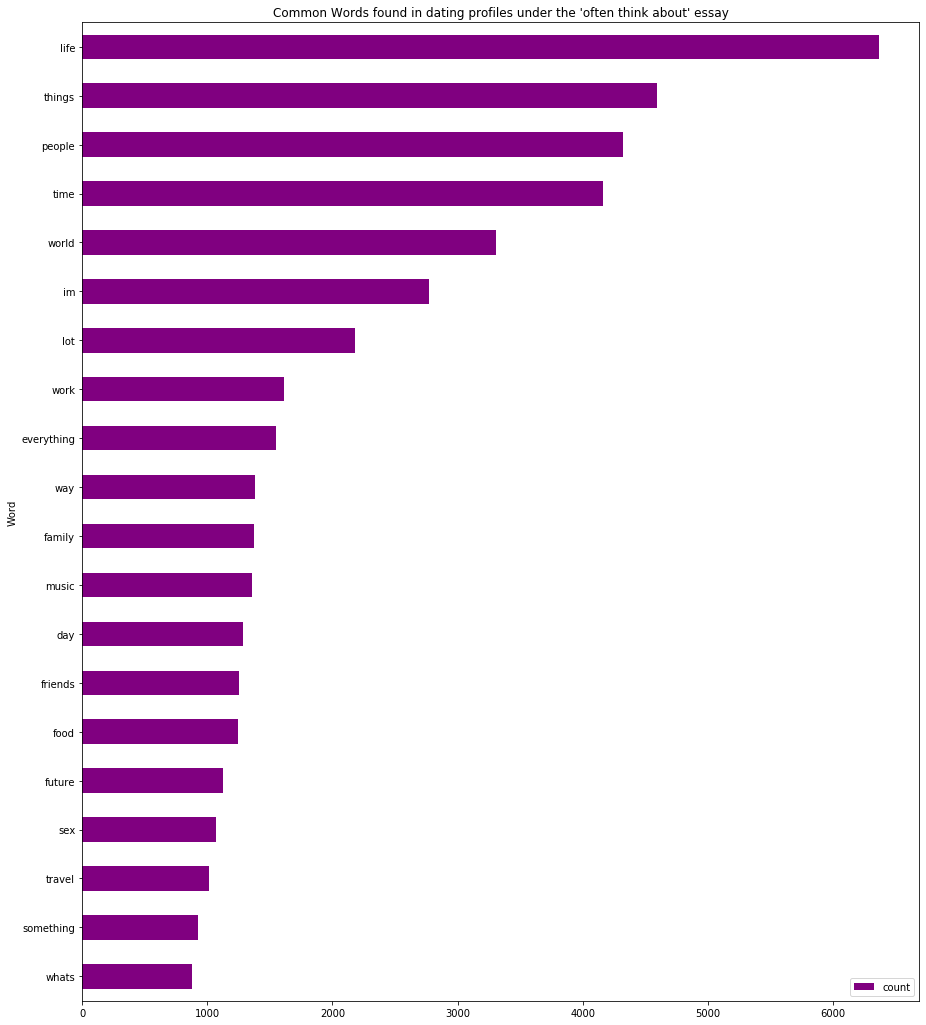

In [28]:
#let's look at common words graph

fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',y='count', ax=ax,color='purple')

ax.set_title("Common Words found in dating profiles under the 'often think about' essay")
plt.show()

#### LOL not super helpful rn

In [29]:
!pip install textblob      #for installation

import textblob            #to import
!pip install wordcloud
from textblob import TextBlob, Word
from wordcloud import WordCloud

# make wordcloud

In [30]:
word_counts = ' '.join(top_words_df['Word'].tolist())
print(type(word_counts))

#make a string out of the top words 

<class 'str'>


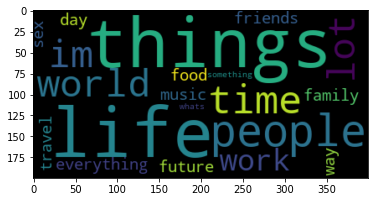

In [31]:
wordcloud = WordCloud().generate(word_counts)
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.axis('off')
plt.show()

In [35]:
#Let's lemmatize all of our text and make a new column

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(thinkredux):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(thinkredux)]

df2['think_lemmatized'] = df2.thinkredux.apply(lemmatize_text)

In [36]:
df2.head()

,age,sex,about me,doingwithlife,strengths,whatothersnoticefirst,mediainterests,cantdowithout,oftenthinkabout,usualfriday,secret,messagemeif,think_revised,stopwords,thinknopunc,char_count,thinkredux,text_lemmatized,think_lemmatized
0,22,m,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,duality humorous things,1,duality humorous things,23,duality humorous things,"[duality, humorous, thing]","[duality, humorous, thing]"
5,29,m,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,you're awesome.,contribution world going and/or be. what's bre...,11,contribution world going andor be whats breakf...,64,contribution world going andor be whats breakf...,"[contribution, world, going, andor, be, whats,...","[contribution, world, going, andor, be, whats,..."
9,37,m,my names jake. i'm a creative guy and i look f...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar contrast good food my bike my...",you should,send a message,and say hi.,you can rock the bells,,2,,0,,[],[]
10,35,m,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family friends food women music reading,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,"snowboarding, food, women, goofy nerd stuff, a...",0,snowboarding food women goofy nerd stuff archi...,59,snowboarding food women goofy nerd stuff archi...,"[snowboarding, food, woman, goofy, nerd, stuff...","[snowboarding, food, woman, goofy, nerd, stuff..."
11,28,m,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader. moves = eternal suns...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...",little bit everything. mostly social influence...,16,little bit everything mostly social influences...,170,little bit everything mostly social influences...,"[little, bit, everything, mostly, social, infl...","[little, bit, everything, mostly, social, infl..."


In [37]:

df2.to_csv('okcupidreduxdata.csv')
